In [1]:
import os
import torch
from torch.utils.data import  DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.io import read_image
from glob import glob
import pandas as pd
import torch.nn.functional as F
from createCSV import vggCSV
from dataloader import VGGDataset
from transformations import CustomTransformationVgg

In [28]:
import sys
sys.path.insert(0,"../")

In [2]:
vggCSV(dir_path="../../data/Training/PALM-Training400/",\
        xlsx_path="../../data/Training/PALM-Training400-Annotation-D&F/Fovea_Location.xlsx",\
        json_path="./customData.json",\
        out_path="../train_vgg")

In [12]:
train_transforms = transforms.Compose([transforms.Resize((224,224))])
train_features = VGGDataset("../train_vgg/VGG_train.csv","../../train_vgg/",train_transforms)
dl = DataLoader(train_features,batch_size=2,shuffle=True)
for image, fovea_loc in dl:
    print(image.shape)
    print(fovea_loc.float()) #Esto me coge un tensor con x e y 
    break
   
# for image, x_fovea, y_fovea in dl:
#     print(image.shape)
#     print(x_fovea.float()) #Esto me coge todas las x
#     print(y_fovea.float()) #Esto me coge todas las y
    
#     break

torch.Size([2, 3, 224, 224])
tensor([[1089.4301, 1022.4700],
        [1359.1700, 1093.6899]])


In [4]:
from PIL import Image
import os

def get_image_sizes(image_folder):
    image_sizes = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                size = img.size
                image_sizes.append(size)
    return image_sizes

# Ejemplo de uso
image_folder = "../../data/Training/PALM-Training400/"
sizes = get_image_sizes(image_folder)
for size in sizes:
    print(size)

(1444, 1444)
(1444, 1444)
(1444, 1444)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(1444, 1444)
(1444, 1444)
(1444, 1444)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(1444, 1444)
(2124, 2056)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(1444, 1444)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)
(2124, 2056)

In [3]:
def get_image_sizes(image_folder):
    image_sizes = []
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                size = img.size
                if size not in image_sizes:
                    image_sizes.append(size)
                    print(f"Imagen: {filename}, Tamaño: {size}")
    return image_sizes

# Ejemplo de uso
image_folder = "../../data/Training/PALM-Training400/"
sizes = get_image_sizes(image_folder)

Imagen: H0001.jpg, Tamaño: (1444, 1444)
Imagen: H0005.jpg, Tamaño: (2124, 2056)


In [5]:
from PIL import Image
import os

def get_image_sizes(image_folder):
    image_sizes = {}
    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            image_path = os.path.join(image_folder, filename)
            with Image.open(image_path) as img:
                size = img.size
                if size not in image_sizes:
                    image_sizes[size] = 1
                else:
                    image_sizes[size] += 1
    return image_sizes

# Ejemplo de uso
image_folder = "../../data/Training/PALM-Training400/"
sizes = get_image_sizes(image_folder)
for size, count in sizes.items():
    print(f"Tamaño: {size}, Número de imágenes: {count}")


Tamaño: (1444, 1444), Número de imágenes: 50
Tamaño: (2124, 2056), Número de imágenes: 350


286
torch.Size([1, 3, 896, 896])
tensor([[[434.7962, 494.5737]]])


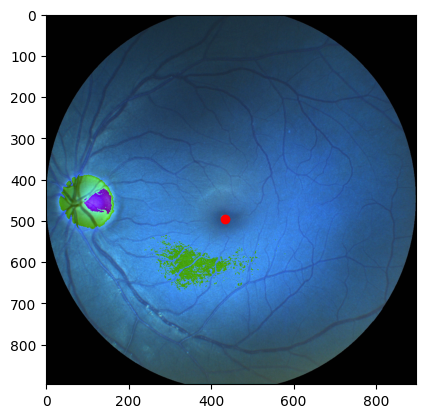

In [27]:
#Prueba de que funciona las transformaciones de Vgg19
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

train_features = VGGDataset("../train_vgg/VGG_train.csv","../../train_vgg/",CustomTransformationVgg(896))
print(train_features.df.shape[0])
dl = DataLoader(train_features,batch_size=1,shuffle=True)
for image, fovea_loc in dl:
    print(image.shape)
    print(fovea_loc.float()) #Esto me coge un tensor con x e y 
    # Obtiene la primera imagen del batch y la convierte en una imagen PIL
    img = ToPILImage()(image[0])
   # Obtiene las dimensiones de la imagen
    width, height = img.size

    # Visualiza la imagen
    plt.imshow(img)

    # Obtiene las coordenadas de fovea_loc
    x, y = fovea_loc[0, 0]

    # Ajusta los límites de los ejes
    plt.xlim(0, width)
    plt.ylim(height, 0)

    # Marca el punto de fovea_loc en la imagen
    plt.plot(x, y, 'ro')
    plt.show()

    break


